# ___Timezone___

#### 한가지 ___Timezone___ 안에 데이터만 다룬다면 몰라도 괜찮다 하지만 ___Timezone___이 섞이게 된다면 꼭 알아야한다
#### 가령 ___미국 Rawdata___와 ___한국 Rawdata___의 시간차를 고려하지 않고 Merge하여 Analysis 한다면 그 이후 작업은 전부 잘못된 데이터를 다루는 것이다
#### 따라서 ___Datetime Index___ 자체에 이 데이터는 어떤 ___Timezone___의 데이터인지 지정해주는 습관이 중요하다
#### 가령 구글 G-mail은 해외에서 열면 해당 국가 ___Timezone___으로 바껴서 나온다

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as display

In [36]:
from datetime import datetime
from datetime import timezone
    # 같은 datetime Package 안에 timezone Package가 있다

In [37]:
timezone.utc    
    # timezone Package 안에는 utc라는 timezone 밖에 없다 (in Python)
    # 따라서 utc에 +9 해주면 KST(Korea Standard Time)이 된다
    # 그런 작업을 해주어야 하기 때문에 불편하다

datetime.timezone.utc

In [38]:
datetime(2019, 1, 1)    
    # timezone unawared datetime

datetime.datetime(2019, 1, 1, 0, 0)

In [39]:
datetime(2019, 1, 1, tzinfo=timezone.utc)
    # timezone awared datetime (같은 2019-01-01 이지만 utc 시간이 명시되어있다)

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)

In [40]:
# 위의 datetime을 KST로 바꾸거나 특정 시간대와의 차이를 알려면 extra package를 쓴다
# conda[pip] install pytz / 많이 사용되는 Package이고 미래에는 Python Standard Library에 들어올 수도 있다
import pytz

In [41]:
pytz.UTC   
    # = pytz.utc
pytz.all_timezones
    # 지정할 수 있는 Hyper Parameter(location)이 모두 나온다
pytz.timezone('Asia/Seoul')    
    # 한국의 timezone

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [42]:
datetime(2019, 1, 1, tzinfo=timezone.utc) == pytz.UTC.localize(datetime(2019, 1, 1))
    # timezone Package 에서는 UTC 말고는 정의하기 힘들다 

True

In [43]:
KST = pytz.timezone('Asia/Seoul')
KST.localize(datetime(2019, 1, 1)) == datetime(2019, 1, 1, tzinfo=timezone.utc)   
    # KST 가 UTC + 9h 라서 False

False

In [44]:
# 한 가지 조심해야할 것! (.replce(tzinfo='') 불가!)
my_date = datetime(2019, 1, 1)

# datetime Object의 시간을 바꿀 때 많이 사용하는 방법
my_date.replace(year=2018)

my_date.replace(tzinfo=KST)
    # replace()로 tzinfo를 바꾸면 +9이 아니라 +8:28이 된다
    # 그래서 timezone에 localize를 한 다음에 datetime 객체를 넘겨준 다음에 return 받아야합니다
my_date_kst = KST.localize(my_date)
my_date_kst

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [45]:
# timezone을 설정하고 난 후 바꿀 수도 있다. 시간을 바꾸지 않고 timezone만 바꾸는 것이 아닌 시간과 timezone 둘 다 바꿀 때,
my_date_kst.astimezone(pytz.utc)    
    # datetime.datetime(2018, 12, 31, 15, 0, tzinfo=<UTC>)
    # 원래 1월 1일 00시 였는데 12월 31일 15시로 -9시간 되며 UTC 시간으로 바뀌었다

my_date_utc = my_date_kst.astimezone(pytz.utc)
my_date_utc == my_date_kst    # True
    # my_date_kst는 2019년 01월 01일 00시인데 timezone이 KST 이다
    # my_date_utc는 2018년 12월 31일 15시인데 timezone이 UTC 이다
    # datetime에 timezone을 저장해놓는 순간 convertion 해서 모든 시간으로 바꿀 수 있다

True

## ___datetime___ 관련 함수들: ___strftime()___, ___today()___, ___weekday()___, ...

In [46]:
# Date Parsing 할 때, strptime(String Parse Time: Parsing a string representing a time according to a format)이 있었다

# 이것은 시간을 저장할 때 사용하는 strftime(String Format Time)
my_date_kst.strftime("%Y-%m-%d %H:%M:%S %Z")    
    # %Z 은 timezone이다
my_date_kst.astimezone(pytz.utc).strftime("%Y-%m-%d %H:%M:%S %Z")    
    # '2018-12-31 15:00:00 UTC'
    # strftime.org 라는 사이트에서 Code 를 참고하자 (범용이라서 모든 Language에서 똑같다)
    
datetime.today()
    # system의 location을 읽어서 시간을 결정한다(해당 PC에 설정된 timezone에 따라 달라진다)
datetime.utcnow().astimezone(KST)
    # 그래서 일단 UTC로 시간을 받아온 담음 원하는 timezone으로 바꾸는 이 Code를 더 선호한다

today = datetime.today()
today.weekday()
    # 오늘이 무슨 요일인지 알고 싶을 때 (0: 월요일, 1: 화요일, 2: 수요일, ..., 6: 일요일)

# e.g) 가장 최근의 금요일을 알아내보자
# Hint: 오늘에서 일주일을 뺀다음 오늘이 지난 금요일에서 며칠이 지났는지 offset을 더해주면 된다

def my_last_friday():
    today = KST.localize(datetime.today())
    target_day = today
    for i in range(7):
        target_day = target_day.replace(day=today.day-i)
        if target_day.weekday() == 4:
            return target_day
        
def last_friday():
    today = KST.localize(datetime.today())
    offset = 4 - today.weekday() % 4
    a_week_ago = today.replace(day=today.day-7)
    last_friday = a_week_ago.replace(day=a_week_ago.day+offset)
    return last_friday
    # 이 함수에는 문제가 하나 있다 
    # 월 초에 이 함수를 쓰면 오늘이 7일 미만이면 day=today.day-7 in line4 코드에 의해 음수값이 나와 에러가 난다
    # 월 말에 이 함수를 쓰면 (가령 30일이라면 offset을 더하면 35일이 딘다) 에러가 난다
    # 그런 문제를 해결하기 위해서 timedelta가 있다

## ___timedelta()___

In [47]:
from datetime import timedelta
pytz.utc.localize(my_date) - KST.localize(my_date)
    # datetime.timedelta(seconds=32400) >>> timedelta에 초로 저장된다 (32,400초는 9시간이다)
pytz.utc.localize(my_date) + timedelta(seconds=32400)
    # datetime.datetime(2019, 1, 1, 9, 0, tzinfo=<UTC>) >>> 9시간 늘어났다. UTC가 9시니 KST로 바꾸면 -9하면 된다
    # 월을 넘어가거나 앞당기게 되면 그것도 같이 계산해준다

def better_last_friday():
    today = KST.localize(datetime.today())
    offset = 4 - today.weekday() % 4
    a_week_ago = today - timedelta(weeks=1)
        # instead of >>> a_week_ago = today.replace(day=today.day-7)
    last_friday = a_week_ago + timedelta(days=offset)
        # instead of >>> last_friday = a_week_ago.replace(day=a_week_ago.day+offset)
    return last_friday

## ___Time Series Data Visualization___ (시계열 데이터 시각화)


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
%matplotlib inline

In [51]:
# 다시 애플..
df_apple = \
pd.read_csv('data/apple_stock.csv', index_col='Date', parse_dates=True)
    # parse_dates=True 하면 'Date' Column(object type)을 datetime type로 Parsing 한다

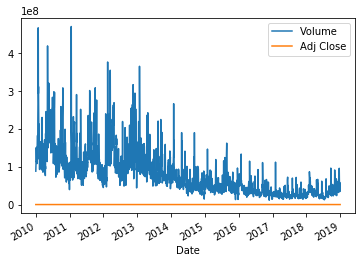

In [57]:
# 한 Column이 아니라 여러 개의 Columns를 plotting 해주려면 한꺼번에 여러 Column을 selection 해주면 된다
df_apple[['Volume', 'Adj Close']]
    # 원래 DataFrame의 Sub DataFrame이 만들어진다
df_apple[['Volume', 'Adj Close']].plot()
    # 위의 Sub DataFrame을 바로 plot 해버리면 Column 이름이 legend로 설정된다
    # datetime index를 가지고 있기 때문에 자동적으로 x-axis에 날짜로 설정해준다
    
    # 이 그래프의 문제는 Volume과 Adj Close의 variation이 다르다보니 Volume은 유동성을 보여주고 있는 반면
    # Adj Close는 Constant인 것 같다. 허나 Adj Close 값도 변화량을 가지고 있다

In [64]:
df_apple['Adj Close'].plot()
    # Adj Close Column만 plot하면 변화량을 관찰할 수 있다

df_apple[['Volume', 'Adj Close']].plot(secondary_y=['Volume'])
    # Volume 값을 우측에 그려줄 수 있다
    # Volume과 Adj Close의 단위가 다르기 때문에 다른 축에 그려지면서 경향성을 확인할 수 있다

Text(0.5, 1.0, 'APPL')

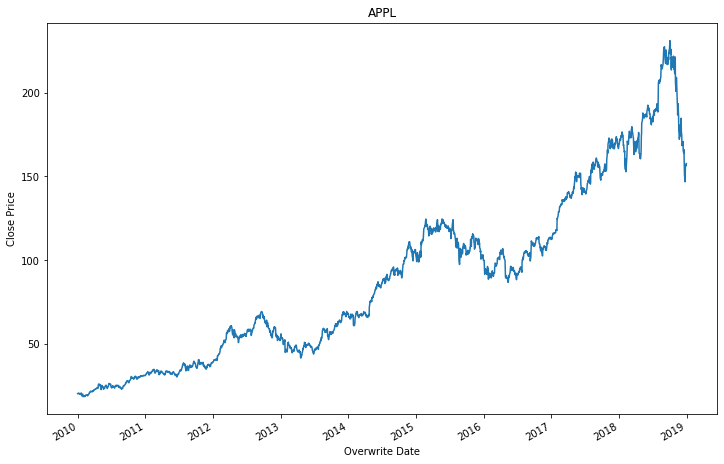

In [65]:
df_apple['Adj Close'].plot(figsize=(12,8))

# 주피터 노트북이니까 가능한 일인데 한 Cell에 같이 있는 애들은 함께 실행된다
# plot 에서 바꾸고 싶은 것이 있으면 한 Cell에 함께 표시해주면 고칠 수 있다
plt.ylabel('Close Price')
    # y축의 label name을 달아준다
plt.xlabel('Overwrite Date')
    # 원래는 x-axis의 label이 'Date' 였으나 'Overwrite Date'로 덮어써버렸다
    # 이렇게 한 Cell에서 Decoration을 해주면 된다
plt.title('APPL')
    # Graph의 title을 부여한다
# 기본적인 것은 Pandas의 Plot가지고 그리고 나머지는 matplotlib에 있는 함수로 decoration 해주면 한 Cell 에서 실행됐을 때,
# Plot에서 Decoration해서 표시해줄 수 있다

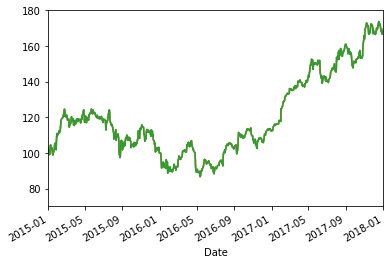

In [70]:
# 또 Pandas의 내장 plotting 함수가 유용한 것이
df_apple['Adj Close']['2015-01-01':'2018-01-01']
    # Pandas의 datetime index를 활용하여 범위를 지정할 수 있다
df_apple['Adj Close']['2015-01-01':'2018-01-01'].plot()
    # 이렇게 바로 .plot()을 할 수도 있지만
df_apple['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'])
    # 일단 x-limit로 날짜를 지정해줄 수도 있다
    # tuple로 들어가게 되어있어서 날짜 사이에 콤마를 넣어준다
    # range(:)는 Pandas에서만 먹는 Syntax이다
df_apple['Adj Close'].plot(xlim=['2015-01-01','2018-01-01'],\
                          ylim=[70,180])
    # 위 아래 여백이 많기 때문에 y-limit도 지정해주면 좀 더 다이나믹한 그래프를 그릴 수 있다

In [71]:
index = df_apple['2015-01-01':'2018-01-01'].index
stock = df_apple['2015-01-01':'2018-01-01']['Adj Close']

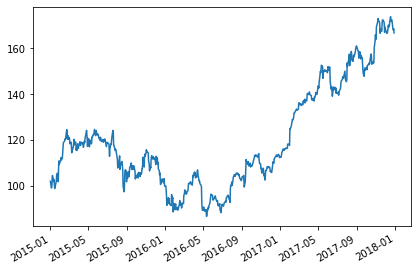

In [77]:
# 이것은 matplotlib으로 그리는 것이다
fig, ax = plt.subplots()    # subplots()에 parameter를 안줬기 때문에 1개 짜리 plot가 만들어진다
ax.plot_date(index, stock, '-')
    # '-'는 line으로 그리라는 뜻이다
    # xlabel들이 서로 겹친 것을 볼 수 있다
plt.tight_layout()
    # label이나 graph 끼리 겹칠 때도 있기 때문에 tight_layout()은 꼭 한 번씩 실행해주자
    # 허나 이 graph에서는 해결이 안됐다
fig.autofmt_xdate()
    # format을 알아서(auto)로 해결하라고 하면 label들을 눕혀준다

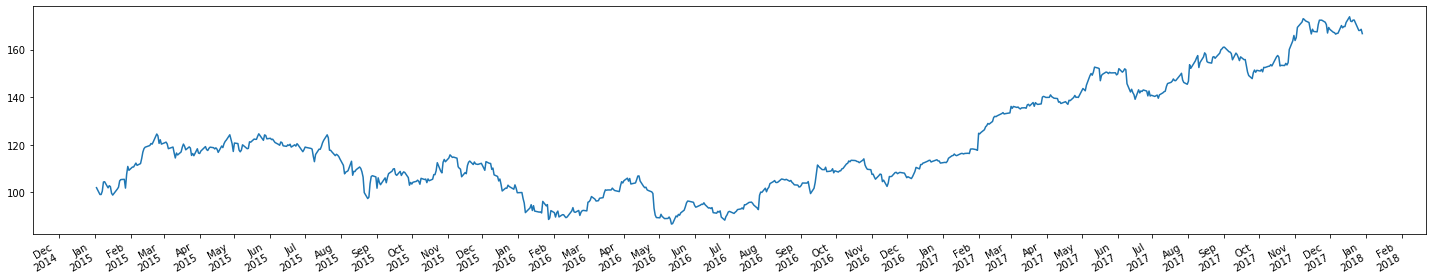

In [80]:
import matplotlib.dates as dates
# 그 다음에 알려드릴 만한게..
# index format도 바꿀 수 있어요..
# 가령 년, 월을 그냥 숫자로 적었으나,

fig, ax = plt.subplots(figsize=(20,4))
ax.plot_date(index, stock, '-')

ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))
    # month를 location으로 표시하도록 해줬다
    # 개행 문자(\n)를 넣어서 두 줄로 표시되게 해줬다
    # 포멧을 다양하게 할 수 있다 major_locator나 major_formatter로 검색해보면 관련된 내용이 나올테니 찾아쓰세요
fig.autofmt_xdate()
plt.tight_layout()